In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)

In [2]:
path = './data/train.csv'

# Load the dataframe
data = pd.read_csv(path,delimiter=',')

# Remove the Id column from the dataset
# data.drop('Id',axis=1,inplace=True)

print('Shape of the data is: ',data.shape)

data.head()



Shape of the data is:  (52310, 11)


,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [3]:
data.describe()

,ID,Duration,Net Sales,Commision (in value),Age,Claim
count,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000
mean,6005.745804,58.256108,48.554673,12.219963,39.555725,0.166699
std,2306.450475,109.138708,60.198589,22.847645,13.762473,0.372710
min,2000.000000,-2.000000,-389.000000,0.000000,0.000000,0.000000
25%,4015.000000,10.000000,19.800000,0.000000,33.000000,0.000000
50%,6002.000000,24.000000,29.500000,0.000000,36.000000,0.000000
75%,8004.000000,57.000000,55.000000,13.380000,43.000000,0.000000
max,10000.000000,4881.000000,682.000000,262.760000,118.000000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52310 entries, 0 to 52309
Data columns (total 11 columns):
ID                      52310 non-null int64
Agency                  52310 non-null object
Agency Type             52310 non-null object
Distribution Channel    52310 non-null object
Product Name            52310 non-null object
Duration                52310 non-null int64
Destination             52310 non-null object
Net Sales               52310 non-null float64
Commision (in value)    52310 non-null float64
Age                     52310 non-null int64
Claim                   52310 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 4.4+ MB


In [5]:

# Function to identify numeric features
def numeric_features(dataset):
    numeric_col = dataset.select_dtypes(include=np.number).columns.tolist()
    return numeric_col

numeric_columns = numeric_features(data)
print("Numeric Features in list:")
print(numeric_columns)
print("Number of Numeric Features:")
print(len(numeric_columns))
print("===="*20)

Numeric Features in list:
['ID', 'Duration', 'Net Sales', 'Commision (in value)', 'Age', 'Claim']
Number of Numeric Features:
6


In [6]:
# Function to identify categorical features
def categorical_features(dataset):
    categorical_col = dataset.select_dtypes(exclude=np.number).columns.tolist()
    return categorical_col

categorical_columns = categorical_features(data)
print("Categorical Features in list:")
print(categorical_columns)
print("Number of Categorical Features:")
print(len(categorical_columns))
print("===="*20)

Categorical Features in list:
['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Destination']
Number of Categorical Features:
5


In [7]:
# Function to identify the number of missing values in every feature
def missing_data(dataset):
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
    
    
missing_data = missing_data(data)
print(missing_data)

                      Total  Percent
Claim                     0      0.0
Age                       0      0.0
Commision (in value)      0      0.0
Net Sales                 0      0.0
Destination               0      0.0
Duration                  0      0.0
Product Name              0      0.0
Distribution Channel      0      0.0
Agency Type               0      0.0
Agency                    0      0.0
ID                        0      0.0


In [8]:
#Check for Class Imbalance
def class_imbalance(target):
    class_values = (target.value_counts()/target.value_counts().sum())*100
    return class_values

class_imbalance(data['Claim'])

0    83.330147
1    16.669853
Name: Claim, dtype: float64

In [9]:
data[data['Age']<60]

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.000000,0.000000,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.000000,0.000000,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.800000,11.880000,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.000000,0.000000,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.000000,0.000000,36,0
5,5959,EPX,Travel Agency,Online,2 way Comprehensive Plan,4,THAILAND,25.000000,0.000000,38,0
6,6031,EPX,Travel Agency,Online,Cancellation Plan,215,UNITED KINGDOM,59.000000,0.000000,36,0
7,8394,JZI,Airlines,Online,Basic Plan,31,VIET NAM,22.000000,7.700000,43,0
8,3017,EPX,Travel Agency,Online,2 way Comprehensive Plan,13,CHINA,48.662699,0.000000,36,1
9,8054,C2B,Airlines,Online,Bronze Plan,10,SINGAPORE,23.258824,5.817294,28,1


In [10]:
# Function to detect outliers in every feature
def detect_outliers(dataframe):
    cols = list(dataframe)
    outliers = pd.DataFrame(columns=['Feature','Number of Outliers'])
    
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            # first quartile (Q1)
            q1 = dataframe[column].quantile(0.25) 
            
            # third quartile (Q3)
            q3 = dataframe[column].quantile(0.75)
            
            # IQR
            iqr = q3 - q1
            
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column,'Number of Outliers':dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(data)


,Feature,Number of Outliers
0,ID,0
1,Duration,5484
2,Net Sales,5335
3,Commision (in value),6394
4,Age,3675
5,Claim,8720


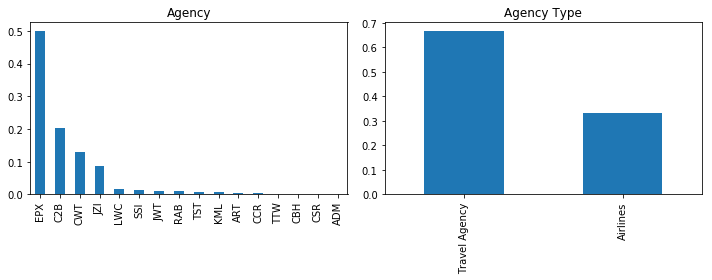

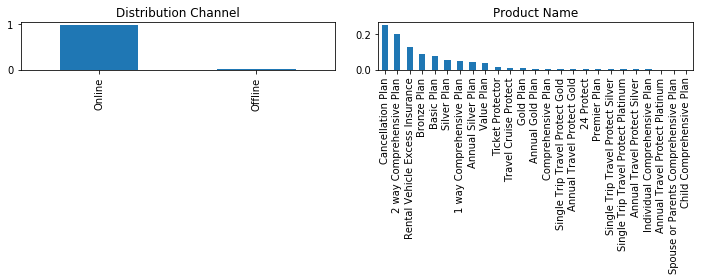

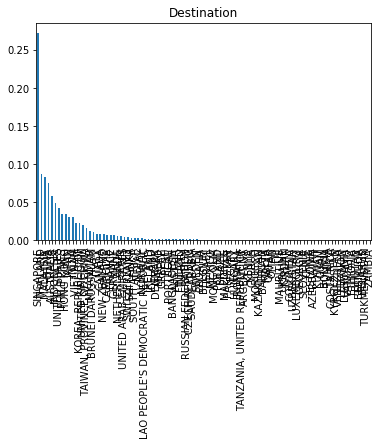

In [11]:
# Function to perform univariate analysis of categorical columns
def plot_categorical_columns(dataframe):
    categorical_columns = dataframe.select_dtypes(include=['object']).columns
    
    for i in range(0,len(categorical_columns),2):
            if len(categorical_columns) > i+1:
                
                plt.figure(figsize=(10,4))
                plt.subplot(121)
                dataframe[categorical_columns[i]].value_counts(normalize=True).plot(kind='bar')
                plt.title(categorical_columns[i])
                plt.subplot(122)     
                dataframe[categorical_columns[i+1]].value_counts(normalize=True).plot(kind='bar')
                plt.title(categorical_columns[i+1])
                plt.tight_layout()
                plt.show()

            else:
                dataframe[categorical_columns[i]].value_counts(normalize=True).plot(kind='bar')
                plt.title(categorical_columns[i])
        
plot = plot_categorical_columns(data)


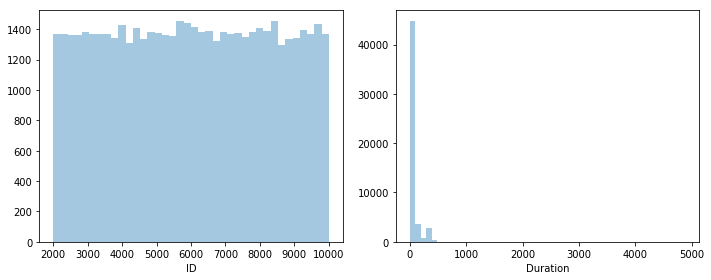

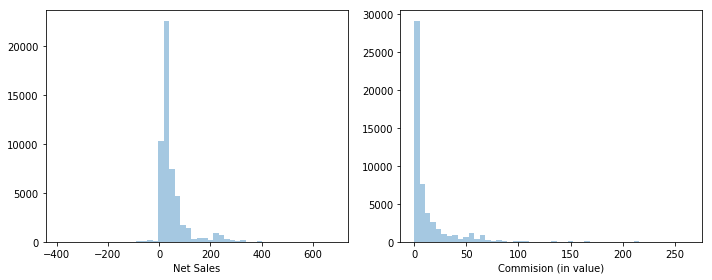

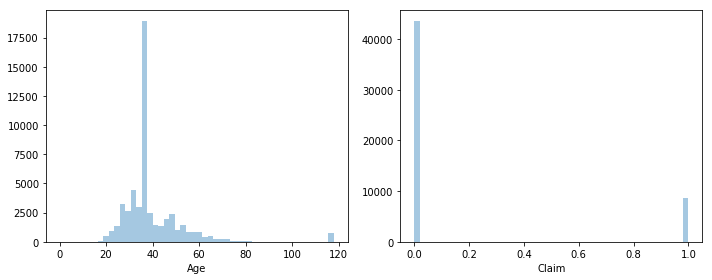

In [12]:

# Function to plot histograms
def plot_continuous_columns(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.distplot(dataframe[numeric_columns[i]], kde=False)
            plt.subplot(122)            
            sns.distplot(dataframe[numeric_columns[i+1]], kde=False)
            plt.tight_layout()
            plt.show()

        else:
            sns.distplot(dataframe[numeric_columns[i]], kde=False)

plot_continuous_columns(data)



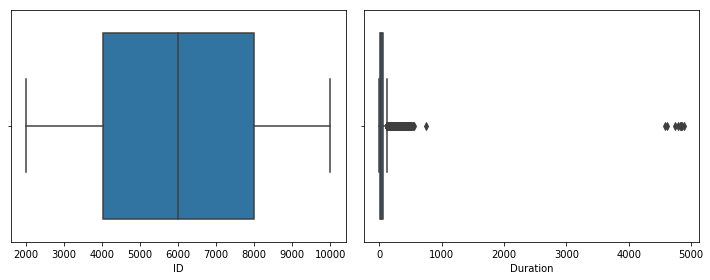

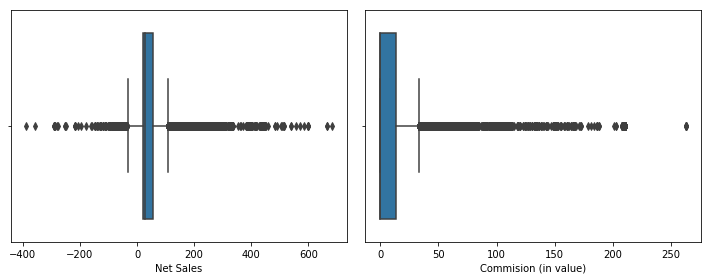

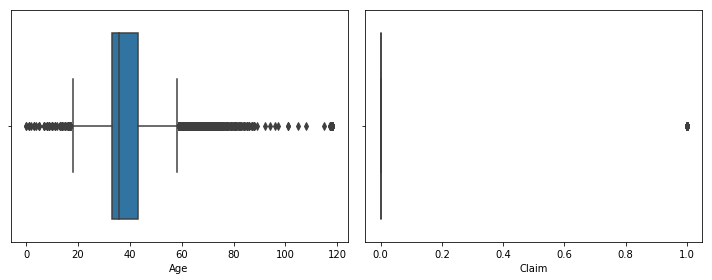

In [13]:
# Function to plot boxplots
def plot_box_plots(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.boxplot(dataframe[numeric_columns[i]])
            plt.subplot(122)            
            sns.boxplot(dataframe[numeric_columns[i+1]])
            plt.tight_layout()
            plt.show()

        else:
            sns.boxplot(dataframe[numeric_columns[i]])
           
plot_box_plots(data)

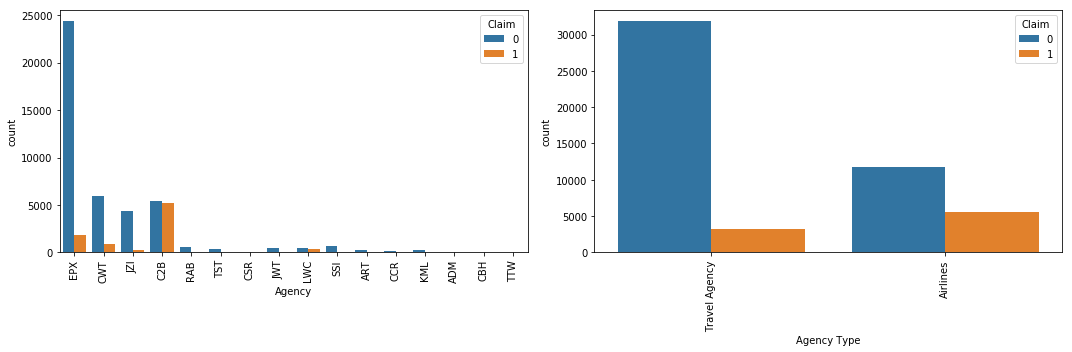

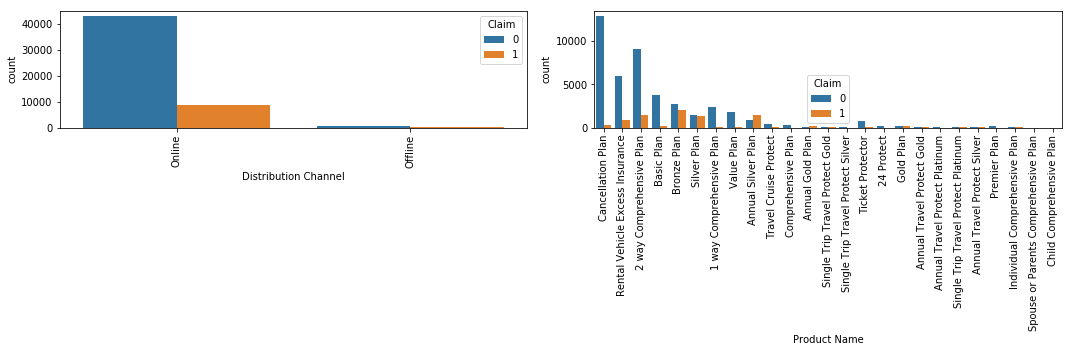

In [14]:
def bivariate_analysis_categorical(dataframe,target):
    categorical_columns = dataframe.select_dtypes(exclude=np.number).columns
    for i in range(0,len(categorical_columns),2):
        if len(categorical_columns) > i+1:
            plt.figure(figsize=(15,5))
            plt.subplot(121)
            sns.countplot(x=dataframe[categorical_columns[i]],hue=target,data=dataframe)
            plt.xticks(rotation=90)
            plt.subplot(122)            
            sns.countplot(dataframe[categorical_columns[i+1]],hue=target,data=dataframe)
            plt.xticks(rotation=90)
            plt.tight_layout()
            plt.show()


bivariate_analysis_categorical(data,data['Claim'])

In [15]:
data_num = data[numeric_columns]
data_num.head()

,ID,Duration,Net Sales,Commision (in value),Age,Claim
0,2010,61,12.0,0.00,41,0
1,4245,4,17.0,0.00,35,0
2,9251,26,19.8,11.88,47,0
3,4754,15,27.0,0.00,48,0
4,8840,15,37.0,0.00,36,0


In [16]:
data_cat = data[categorical_columns]
data_cat.head()

,Agency,Agency Type,Distribution Channel,Product Name,Destination
0,EPX,Travel Agency,Online,Cancellation Plan,PHILIPPINES
1,EPX,Travel Agency,Online,Cancellation Plan,MALAYSIA
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,THAILAND
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,HONG KONG
4,EPX,Travel Agency,Online,2 way Comprehensive Plan,MALAYSIA


In [17]:
data_cat_dummies = pd.get_dummies(data_cat)
# del df_dummies[df_dummies.columns[-1]]
df_new = pd.concat([data_num, data_cat_dummies], axis=1)
df_new.head()

,ID,Duration,Net Sales,Commision (in value),Age,Claim,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JWT,Agency_JZI,Agency_KML,Agency_LWC,Agency_RAB,Agency_SSI,Agency_TST,Agency_TTW,Agency Type_Airlines,Agency Type_Travel Agency,Distribution Channel_Offline,Distribution Channel_Online,Product Name_1 way Comprehensive Plan,Product Name_2 way Comprehensive Plan,Product Name_24 Protect,Product Name_Annual Gold Plan,Product Name_Annual Silver Plan,Product Name_Annual Travel Protect Gold,Product Name_Annual Travel Protect Platinum,Product Name_Annual Travel Protect Silver,Product Name_Basic Plan,Product Name_Bronze Plan,Product Name_Cancellation Plan,Product Name_Child Comprehensive Plan,Product Name_Comprehensive Plan,Product Name_Gold Plan,Product Name_Individual Comprehensive Plan,Product Name_Premier Plan,Product Name_Rental Vehicle Excess Insurance,Product Name_Silver Plan,Product Name_Single Trip Travel Protect Gold,Product Name_Single Trip Travel Protect Platinum,Product Name_Single Trip Travel Protect Silver,Product Name_Spouse or Parents Comprehensive Plan,Product Name_Ticket Protector,Product Name_Travel Cruise Protect,Product Name_Value Plan,Destination_ARGENTINA,Destination_AUSTRALIA,Destination_AUSTRIA,Destination_AZERBAIJAN,Destination_BAHRAIN,Destination_BANGLADESH,Destination_BELARUS,Destination_BELGIUM,Destination_BERMUDA,Destination_BHUTAN,Destination_BOLIVIA,Destination_BRAZIL,Destination_BRUNEI DARUSSALAM,Destination_CAMBODIA,Destination_CANADA,Destination_CHILE,Destination_CHINA,Destination_COLOMBIA,Destination_COSTA RICA,Destination_CROATIA,Destination_CYPRUS,Destination_CZECH REPUBLIC,Destination_DENMARK,Destination_EGYPT,Destination_ESTONIA,Destination_ETHIOPIA,Destination_FIJI,Destination_FINLAND,Destination_FRANCE,Destination_GEORGIA,Destination_GERMANY,Destination_GREECE,Destination_GUAM,Destination_HONG KONG,Destination_HUNGARY,Destination_ICELAND,Destination_INDIA,Destination_INDONESIA,Destination_IRELAND,Destination_ISRAEL,Destination_ITALY,Destination_JAPAN,Destination_JORDAN,Destination_KAZAKHSTAN,Destination_KENYA,"Destination_KOREA, REPUBLIC OF",Destination_KUWAIT,Destination_KYRGYZSTAN,Destination_LAO PEOPLE'S DEMOCRATIC REPUBLIC,Destination_LEBANON,Destination_LITHUANIA,Destination_LUXEMBOURG,Destination_MACAO,Destination_MALAYSIA,Destination_MALDIVES,Destination_MALTA,Destination_MAURITIUS,Destination_MEXICO,Destination_MONGOLIA,Destination_MOROCCO,Destination_MYANMAR,Destination_NEPAL,Destination_NETHERLANDS,Destination_NEW ZEALAND,Destination_NORWAY,Destination_OMAN,Destination_PAKISTAN,Destination_PERU,Destination_PHILIPPINES,Destination_POLAND,Destination_PORTUGAL,Destination_QATAR,Destination_ROMANIA,Destination_RUSSIAN FEDERATION,Destination_SAUDI ARABIA,Destination_SINGAPORE,Destination_SLOVENIA,Destination_SOUTH AFRICA,Destination_SPAIN,Destination_SRI LANKA,Destination_SWEDEN,Destination_SWITZERLAND,"Destination_TAIWAN, PROVINCE OF CHINA","Destination_TANZANIA, UNITED REPUBLIC OF",Destination_THAILAND,Destination_TUNISIA,Destination_TURKEY,Destination_TURKMENISTAN,Destination_UKRAINE,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,Destination_ZAMBIA
0,2010,61,12.0,0.00,41,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4245,4,17.0,0.00,35,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9251,26,19.8,11.88,47,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,

In [18]:
x = df_new.values
correlation_matrix = np.corrcoef(x.T)
print(correlation_matrix)

[[ 1.00000000e+00  3.55157104e-04  4.26767706e-03 ... -1.07897247e-02
   3.28962098e-03  7.18332555e-03]
 [ 3.55157104e-04  1.00000000e+00  5.95261490e-01 ... -1.20239634e-03
  -4.66119519e-02 -1.89319383e-03]
 [ 4.26767706e-03  5.95261490e-01  1.00000000e+00 ...  4.82224230e-03
  -6.94308275e-02 -1.12977124e-03]
 ...
 [-1.07897247e-02 -1.20239634e-03  4.82224230e-03 ...  1.00000000e+00
  -1.34281464e-03 -3.82354347e-05]
 [ 3.28962098e-03 -4.66119519e-02 -6.94308275e-02 ... -1.34281464e-03
   1.00000000e+00 -6.71388068e-04]
 [ 7.18332555e-03 -1.89319383e-03 -1.12977124e-03 ... -3.82354347e-05
  -6.71388068e-04  1.00000000e+00]]


In [19]:
data_cat_dummies.corr()

# cor

,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JWT,Agency_JZI,Agency_KML,Agency_LWC,Agency_RAB,Agency_SSI,Agency_TST,Agency_TTW,Agency Type_Airlines,Agency Type_Travel Agency,Distribution Channel_Offline,Distribution Channel_Online,Product Name_1 way Comprehensive Plan,Product Name_2 way Comprehensive Plan,Product Name_24 Protect,Product Name_Annual Gold Plan,Product Name_Annual Silver Plan,Product Name_Annual Travel Protect Gold,Product Name_Annual Travel Protect Platinum,Product Name_Annual Travel Protect Silver,Product Name_Basic Plan,Product Name_Bronze Plan,Product Name_Cancellation Plan,Product Name_Child Comprehensive Plan,Product Name_Comprehensive Plan,Product Name_Gold Plan,Product Name_Individual Comprehensive Plan,Product Name_Premier Plan,Product Name_Rental Vehicle Excess Insurance,Product Name_Silver Plan,Product Name_Single Trip Travel Protect Gold,Product Name_Single Trip Travel Protect Platinum,Product Name_Single Trip Travel Protect Silver,Product Name_Spouse or Parents Comprehensive Plan,Product Name_Ticket Protector,Product Name_Travel Cruise Protect,Product Name_Value Plan,Destination_ARGENTINA,Destination_AUSTRALIA,Destination_AUSTRIA,Destination_AZERBAIJAN,Destination_BAHRAIN,Destination_BANGLADESH,Destination_BELARUS,Destination_BELGIUM,Destination_BERMUDA,Destination_BHUTAN,Destination_BOLIVIA,Destination_BRAZIL,Destination_BRUNEI DARUSSALAM,Destination_CAMBODIA,Destination_CANADA,Destination_CHILE,Destination_CHINA,Destination_COLOMBIA,Destination_COSTA RICA,Destination_CROATIA,Destination_CYPRUS,Destination_CZECH REPUBLIC,Destination_DENMARK,Destination_EGYPT,Destination_ESTONIA,Destination_ETHIOPIA,Destination_FIJI,Destination_FINLAND,Destination_FRANCE,Destination_GEORGIA,Destination_GERMANY,Destination_GREECE,Destination_GUAM,Destination_HONG KONG,Destination_HUNGARY,Destination_ICELAND,Destination_INDIA,Destination_INDONESIA,Destination_IRELAND,Destination_ISRAEL,Destination_ITALY,Destination_JAPAN,Destination_JORDAN,Destination_KAZAKHSTAN,Destination_KENYA,"Destination_KOREA, REPUBLIC OF",Destination_KUWAIT,Destination_KYRGYZSTAN,Destination_LAO PEOPLE'S DEMOCRATIC REPUBLIC,Destination_LEBANON,Destination_LITHUANIA,Destination_LUXEMBOURG,Destination_MACAO,Destination_MALAYSIA,Destination_MALDIVES,Destination_MALTA,Destination_MAURITIUS,Destination_MEXICO,Destination_MONGOLIA,Destination_MOROCCO,Destination_MYANMAR,Destination_NEPAL,Destination_NETHERLANDS,Destination_NEW ZEALAND,Destination_NORWAY,Destination_OMAN,Destination_PAKISTAN,Destination_PERU,Destination_PHILIPPINES,Destination_POLAND,Destination_PORTUGAL,Destination_QATAR,Destination_ROMANIA,Destination_RUSSIAN FEDERATION,Destination_SAUDI ARABIA,Destination_SINGAPORE,Destination_SLOVENIA,Destination_SOUTH AFRICA,Destination_SPAIN,Destination_SRI LANKA,Destination_SWEDEN,Destination_SWITZERLAND,"Destination_TAIWAN, PROVINCE OF CHINA","Destination_TANZANIA, UNITED REPUBLIC OF",Destination_THAILAND,Destination_TUNISIA,Destination_TURKEY,Destination_TURKMENISTAN,Destination_UKRAINE,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,Destination_ZAMBIA
Agency_ADM,1.000000,-0.002142,-0.016518,-0.001249,-0.001790,-0.001109,-0.012668,-0.032816,-0.003375,-0.010188,-0.002540,-0.004095,-0.003303,-0.004028,-0.002852,-0.001461,-0.023026,0.023026,-0.004309,0.004309,-0.007193,-0.016459,-0.001841,-0.002465,-0.007097,-0.001940,-0.001013,-0.001374,-0.009473,-0.010313,-0.019071,-0.000405,-0.002393,-0.002800,-0.001313,0.336547,-0.012668,-0.007876,-0.002273,-0.001433,-0.001634,-0.000496,-0.004028,-0.002852,0.073554,-0.000496,-0.008090,-0.001164,-0.000351,-0.000453,-0.001164,-0.000202,-0.000810,-0.000202,-0.000202,-0.000320,-0.000701,-0.003421,-0.002725,-0.002848,-0.000379,-0.009303,-0.000429,-0.000286,-0.000859,-0.000496,-0.001002,-0.001249,-0.000590,-0.000379,-0.000248,-0.000429,-0.00113

In [20]:
le = LabelEncoder()
# Function that auto encodes any dataframe column of type category or object.
def dummyEncode(dataset):
        
        columnsToEncode = list(dataset.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                dataset[feature] = le.fit_transform(dataset[feature])
            except:
                print('Error encoding '+feature)
        return dataset
data = dummyEncode(data)


In [21]:
data.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,2010,7,1,1,10,61,68,12.0,0.00,41,0
1,4245,7,1,1,10,4,53,17.0,0.00,35,0
2,9251,6,1,1,16,26,84,19.8,11.88,47,0
3,4754,7,1,1,1,15,33,27.0,0.00,48,0
4,8840,7,1,1,1,15,53,37.0,0.00,36,0


In [22]:
cor = data.corr()
cor

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
ID,1.000000,0.003432,0.006130,-0.002154,-0.003581,0.000355,-0.003327,0.004268,0.004822,-0.003083,0.006393
Agency,0.003432,1.000000,0.384416,-0.190533,0.098321,-0.157374,-0.254540,-0.309884,-0.198327,0.134877,-0.343835
Agency Type,0.006130,0.384416,1.000000,-0.087881,-0.236904,-0.179316,-0.208125,-0.241073,-0.208134,-0.158343,-0.287299
Distribution Channel,-0.002154,-0.190533,-0.087881,1.000000,-0.145233,-0.034798,-0.033194,0.022474,0.019763,-0.164675,0.013291
Product Name,-0.003581,0.098321,-0.236904,-0.145233,1.000000,-0.125464,-0.059966,-0.126528,0.199965,0.233632,-0.007200
Duration,0.000355,-0.157374,-0.179316,-0.034798,-0.125464,1.000000,0.112155,0.595261,0.483148,-0.003969,0.201583
Destination,-0.003327,-0.254540,-0.208125,-0.033194,-0.059966,0.112155,1.000000,0.128853,0.041493,-0.053910,0.140395
Net Sales,0.004268,-0.309884,-0.241073,0.022474,-0.126528,0.595261,0.128853,1.000000,0.733110,0.022606,0.326799
Commision (in value),0.004822,-0.198327,-0.208134,0.019763,0.199965,0.483148,0.041493,0.733110,1.000000,0.087455,0.258688
Age,-0.003083,0.134877,-0.158343,-0.164675,0.233632,-0.003969,-0.053910,0.022606,0.087455,1.000000,-0.060228


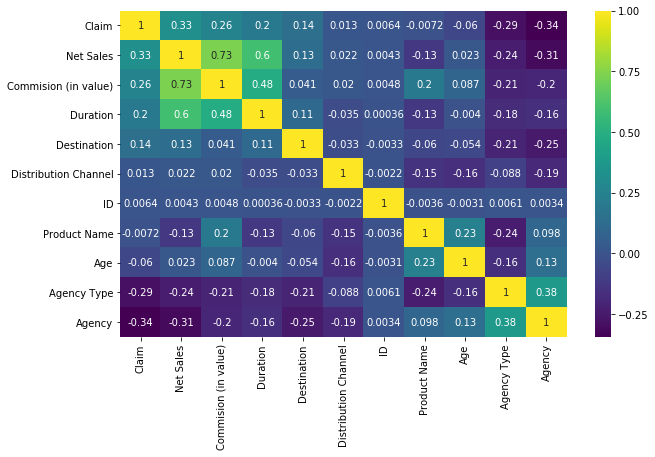

In [23]:
k=11
cols=data.corr().nlargest(k,'Claim')['Claim'].index
cm = data[cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, cmap='viridis')
plt.show()

In [25]:
X

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
0,2010,7,1,1,10,61,68,12.000000,0.000000,41
1,4245,7,1,1,10,4,53,17.000000,0.000000,35
2,9251,6,1,1,16,26,84,19.800000,11.880000,47
3,4754,7,1,1,1,15,33,27.000000,0.000000,48
4,8840,7,1,1,1,15,53,37.000000,0.000000,36
5,5959,7,1,1,1,4,84,25.000000,0.000000,38
6,6031,7,1,1,10,215,90,59.000000,0.000000,36
7,8394,9,0,1,8,31,95,22.000000,7.700000,43
8,3017,7,1,1,1,13,16,48.662699,0.000000,36
9,8054,2,0,1,9,10,75,23.258824,5.817294,28


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      8696
           1       0.59      0.20      0.30      1766

   micro avg       0.84      0.84      0.84     10462
   macro avg       0.73      0.59      0.61     10462
weighted avg       0.81      0.84      0.81     10462

ROC_AUC_SCORE is 0.5865951828518026


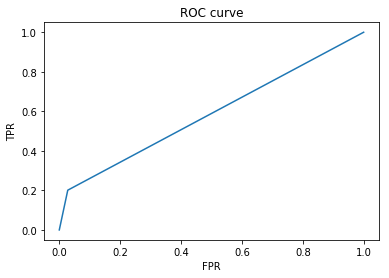

AUC Score = 58.66 %
On Model - 
Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      8696
           1       0.72      0.73      0.72      1766

   micro avg       0.91      0.91      0.91     10462
   macro avg       0.83      0.84      0.83     10462
weighted avg       0.91      0.91      0.91     10462

ROC_AUC_SCORE is 0.8350058240026005


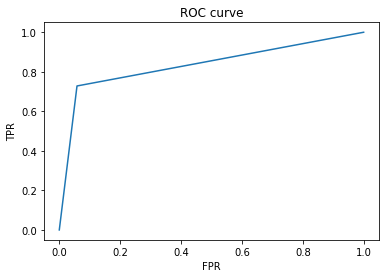

AUC Score = 83.50 %
On Model - 
Decision Tree
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      8696
           1       0.82      0.68      0.74      1766

   micro avg       0.92      0.92      0.92     10462
   macro avg       0.88      0.82      0.85     10462
weighted avg       0.92      0.92      0.92     10462

ROC_AUC_SCORE is 0.8228195673985045


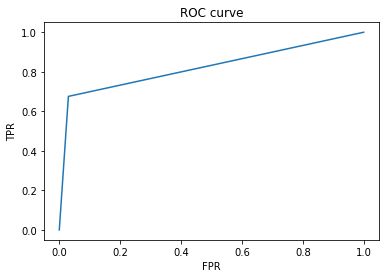

AUC Score = 82.28 %
On Model - 
Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      8696
           1       0.64      0.37      0.46      1766

   micro avg       0.86      0.86      0.86     10462
   macro avg       0.76      0.66      0.69     10462
weighted avg       0.84      0.86      0.84     10462

ROC_AUC_SCORE is 0.6616825559140715


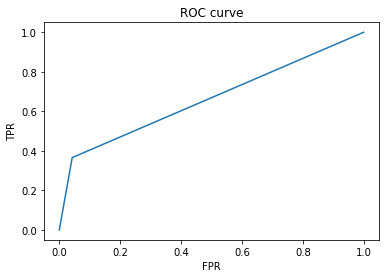

AUC Score = 66.17 %
On Model - 
XGBoost
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      8696
           1       0.65      0.40      0.50      1766

   micro avg       0.86      0.86      0.86     10462
   macro avg       0.77      0.68      0.71     10462
weighted avg       0.85      0.86      0.85     10462

ROC_AUC_SCORE is 0.6789401357128048


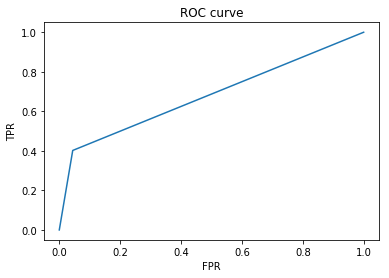

AUC Score = 67.89 %
On Model - 
Gradient Boosting


In [24]:
from sklearn.model_selection import train_test_split

def run_model(predictors,target, model):
    '''
    Performs model training and tests using ROC-AUC 
    returns AUC score
    '''
    x_train,x_val,y_train,y_val = train_test_split(predictors,target,test_size=0.2,random_state=42)
    model.fit(x_train, y_train)
    y_scores = model.predict(x_val)
    auc = roc_auc_score(y_val, y_scores)
    print('Classification Report:')
    print(classification_report(y_val,y_scores))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
    print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
    #fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    return auc

# Predictors
X = data.iloc[:,:-1]

# Target
y = data.iloc[:,-1]

# Choosing the models. If you want to specify additional models, kindly specify them as a key-value pair as shown below.
models = {'Logistic Regression':LogisticRegression,'Decision Tree':DecisionTreeClassifier,'Random Forest': RandomForestClassifier,'XGBoost':XGBClassifier,'Gradient Boosting':GradientBoostingClassifier}

for i in models.items():
    # run model
    model = i[1]()
    auc = run_model(X, y, model) # train and returns AUC test score
    print('AUC Score = %.2f' %(auc*100) +' %\nOn Model - \n'+str(i[0]))
    print('===='*20)